In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


c:\Users\joneh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


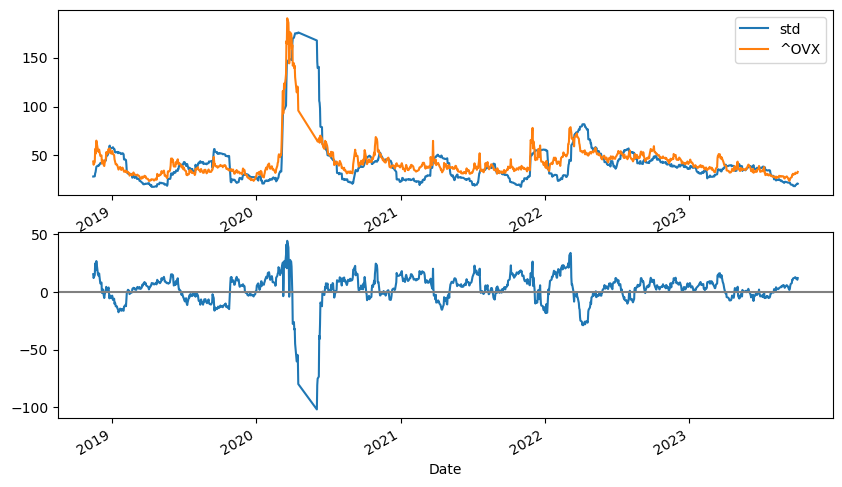

In [29]:
df = yf.download(['CL=F' , '^OVX'], period='5Y', progress=False, ignore_tz=True)['Adj Close']

df['log returns'] = np.log(df['CL=F'] / df['CL=F'].shift())

df['std'] = df['log returns'].rolling(30).std() * np.sqrt(252) * 100

df['risk premium'] = df['^OVX'] - df['std']

df.dropna(inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

df[['std', '^OVX']].plot(figsize=(10, 6), ax=axs[0])
df['risk premium'].plot(figsize=(10, 6), ax=axs[1])
axs[1].axhline(y=0, color='gray', linestyle='-')